<a href="https://colab.research.google.com/github/SolBam/Python-Pra/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_CCTV%2C_%EC%9D%B8%EA%B5%AC%EC%88%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 CCTV 데이터분석 불러오기

## 1. 서울시 CCTV 데이터 불러오기

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np

In [2]:
# 서울시 CCTV 데이터 불러오기
seoul_cctv = pd.read_csv('/content/sample_data/Seoul_CCTV.csv')

In [3]:
# head(): 상단 5개 데이터 확인
# head(n): 넣은 숫자만큼의 데이터 확인
seoul_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
# tail 기능의 장점
# 내 전체 데이터 갯수를 확인할 수 있음
seoul_cctv.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [5]:
# 데이터 프레임의 인덱스
seoul_cctv.index

RangeIndex(start=0, stop=25, step=1)

In [6]:
# 데이터 프레임의 컬럼
seoul_cctv.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
# 데이터 프레임의 값
seoul_cctv.values

array([['강남구', 3238, 1292, 430, 584, 932],
       ['강동구', 1010, 379, 99, 155, 377],
       ['강북구', 831, 369, 120, 138, 204],
       ['강서구', 911, 388, 258, 184, 81],
       ['관악구', 2109, 846, 260, 390, 613],
       ['광진구', 878, 573, 78, 53, 174],
       ['구로구', 1884, 1142, 173, 246, 323],
       ['금천구', 1348, 674, 51, 269, 354],
       ['노원구', 1566, 542, 57, 451, 516],
       ['도봉구', 825, 238, 159, 42, 386],
       ['동대문구', 1870, 1070, 23, 198, 579],
       ['동작구', 1302, 544, 341, 103, 314],
       ['마포구', 980, 314, 118, 169, 379],
       ['서대문구', 1254, 844, 50, 68, 292],
       ['서초구', 2297, 1406, 157, 336, 398],
       ['성동구', 1327, 730, 91, 241, 265],
       ['성북구', 1651, 1009, 78, 360, 204],
       ['송파구', 1081, 529, 21, 68, 463],
       ['양천구', 2482, 1843, 142, 30, 467],
       ['영등포구', 1277, 495, 214, 195, 373],
       ['용산구', 2096, 1368, 218, 112, 398],
       ['은평구', 2108, 1138, 224, 278, 468],
       ['종로구', 1619, 464, 314, 211, 630],
       ['중구', 1023, 413, 190, 72, 348],
   

In [8]:
seoul_cctv.head(1)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932


In [9]:
# 컬럼 이름 변경
seoul_cctv.rename(columns={'기관명':'구별'}, inplace=True)

In [10]:
seoul_cctv.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932


## 2. 서울시 인구 데이터 불러오기

In [16]:
pop_data = '/content/sample_data/Seoul_Population.xls'
pop_seoul = pd.read_excel(pop_data, header=2, usecols='B, D, G, J, N')

In [17]:
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


- 자치구 -> 구별
- 계 -> 인구수
- 계.1 -> 한국인
- 계.2 -> 외국인
- 65세이상고령자 -> 고령자

In [18]:
pop_seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

In [20]:
pop_seoul.rename(columns={
    pop_seoul.columns[0]: '구별',
    pop_seoul.columns[1]: '인구수',
    pop_seoul.columns[2]: '한국인',
    pop_seoul.columns[3]: '외국인',
    pop_seoul.columns[4]: '고령자'
}, inplace=True)

In [21]:
pop_seoul.head(1)

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126


## 3. 데이터 내림차순, 오름차순 정렬해보기

In [22]:
# CCTV 갯수가 많은 상위 5개 구
# ascending=False 내림차순 정렬
# ascending=True 오름차순 정렬, 디폴트 값이 True, 생략 가능
seoul_cctv.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


## 4. 기존 데이터를 활용한 새로운 컬럼 만들기

In [30]:
seoul_cctv['최근증가율'] = (((seoul_cctv['2014년'] + seoul_cctv['2015년'] + seoul_cctv['2016년']) / seoul_cctv['2013년도 이전'])) * 100

In [25]:
# 이런 식으로도 사용 가능
seoul_cctv.구별

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 구별, dtype: object

In [31]:
seoul_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [32]:
# 최근증가율이 높은 상위 5개 구
seoul_cctv.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 5. 서울시 인구현황 데이터 훑어보기

In [33]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [37]:
# '합계' 행 삭제
pop_seoul.drop([0], inplace=True)

In [38]:
pop_seoul.head(2)

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384


In [39]:
pop_seoul['외국인비율'] = (pop_seoul['외국인'] / pop_seoul['인구수']) * 100
pop_seoul['고령자비율'] = (pop_seoul['고령자'] / pop_seoul['인구수']) * 100

In [40]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [41]:
# 인구수가 많은 곳 상위 10개 구
pop_seoul.sort_values(by='인구수', ascending=False).head(10)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362
12,은평구,491202,486794,4408,74559,0.897390,15.178888
15,양천구,475018,471154,3864,55234,0.813443,11.627770
8,성북구,455407,444055,11352,66251,2.492715,14.547646
22,서초구,445401,441102,4299,53205,0.965198,11.945415
17,구로구,441559,410742,30817,58794,6.979135,13.315095


## 6. 서울시 CCTV 데이터와 서울시 인구수 데이터 병합

In [42]:
seoul_cctv.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [43]:
pop_seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [45]:
# 조건1. 데이터의 갯수가 같아야 한다.
len(seoul_cctv), len(pop_seoul)

(25, 25)

In [46]:
# 조건2. 기준 컬럼
# '구별'이라는 공통된 값을 가진 컬럼을 이용

In [47]:
data_result = pd.merge(seoul_cctv, pop_seoul, on='구별')

In [48]:
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [51]:
# 컬럼 삭제
# axis 축
# axis=0 가로축, 행
# axis=1 세로축, 열
unused_year_columns = ['2013년도 이전', '2014년', '2015년', '2016년']
data_result.drop(unused_year_columns, axis=1, inplace=True)

In [52]:
data_result.head(2)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458


## 7. 구별 컬럼을 인덱스로 설정

In [54]:
data_result.set_index(keys='구별', inplace=True)

In [55]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [56]:
data_result.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구별')

In [57]:
data_result['CCTV비율'] = (data_result['소계'] / data_result['인구수']) * 100

In [58]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


## 8. 서울시 구별 CCTV, 인구수 데이터 시각화

In [64]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.5 MB/s eta 0:00:00


In [69]:
import matplotlib.pyplot as plt # 파이썬 시각화 라이브러리
import koreanize_matplotlib # 한글 폰트 적용

In [70]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


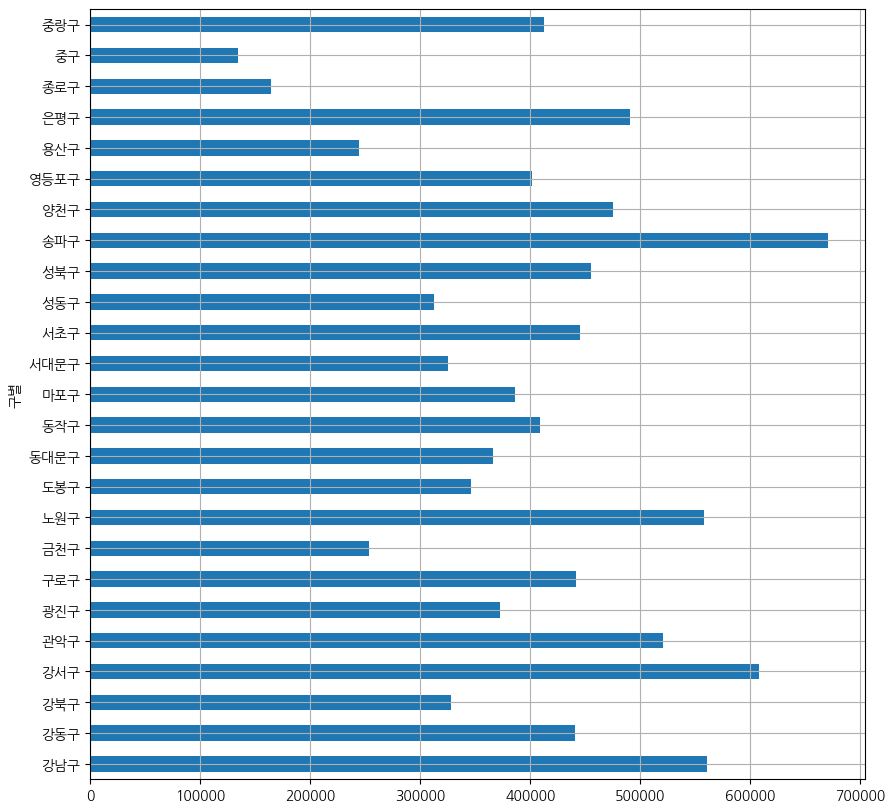

In [73]:
# 인구수를 막대그래프로 시각화
data_result['인구수'].plot(kind='barh', grid=True, figsize=(10, 10));

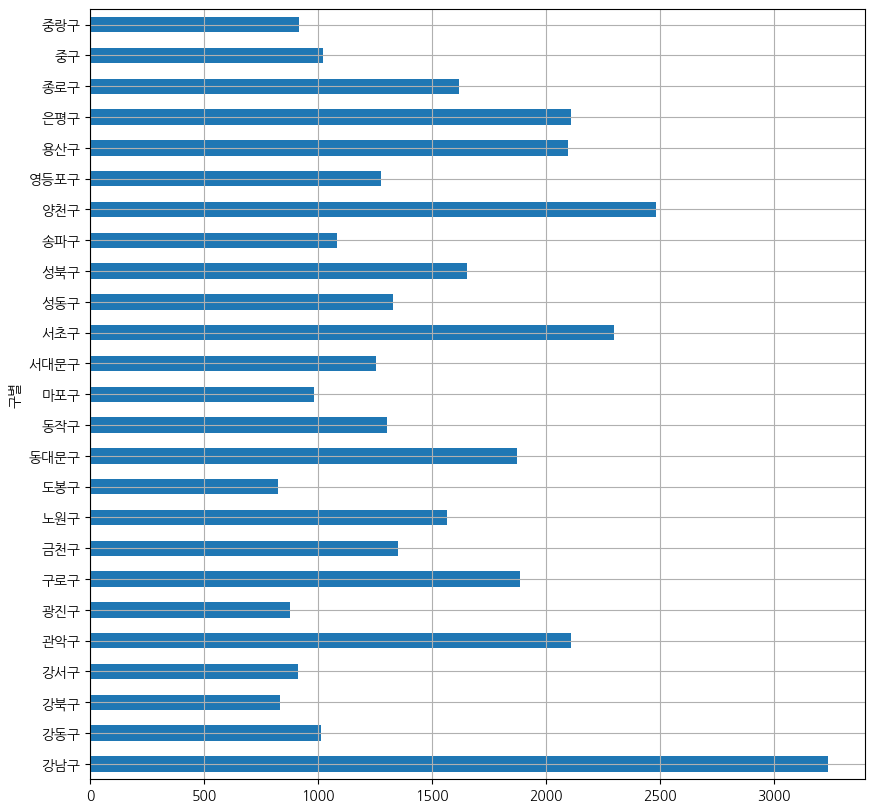

In [74]:
# CCTV 갯수를 막대그래프로 시각화
data_result['소계'].plot(kind='barh', grid=True, figsize=(10, 10));

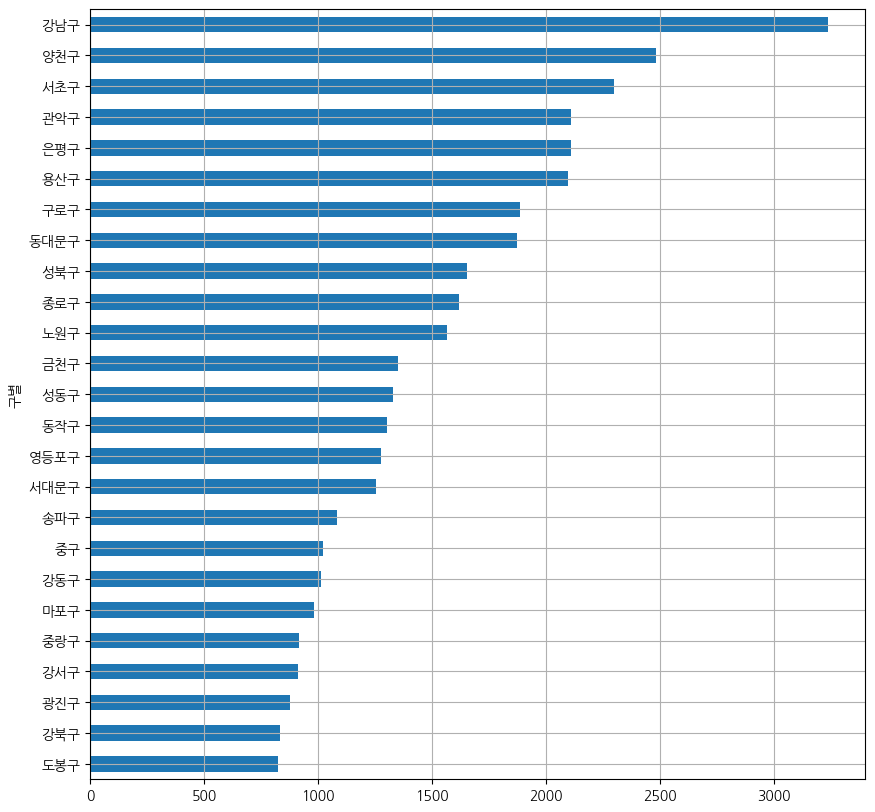

In [79]:
# CCTV 갯수를 내림차순으로 정렬한 뒤 막대그래프로 시각화
data_result['소계'].sort_values(ascending=True).plot(kind='barh', grid=True, figsize=(10, 10));

### [more information] matplotlib simple plot example
- https://matplotlib.org/stable/gallery/index.html

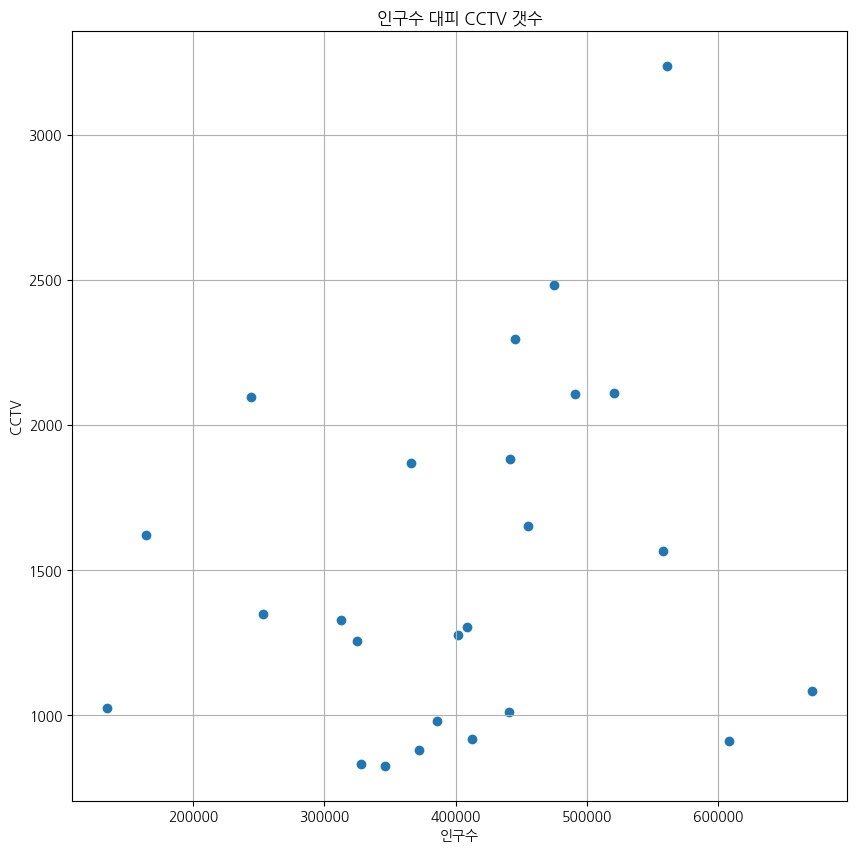

In [87]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구수'], data_result['소계'])

plt.title('인구수 대피 CCTV 갯수')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

plt.show()

In [88]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [89]:
from sklearn.linear_model import LinearRegression

In [97]:
# 정답 데이터, y
# 정답을 도출하기 위한 데이터, x
# 인구수가 몇 일때, 적절한 CCTV 갯수

x = data_result['인구수'].values.reshape(-1, 1)
y = data_result['소계']

In [98]:
# 선형회귀모델 객체 생성

model = LinearRegression()

In [99]:
# 선형회귀모델 학습
model.fit(x, y)

LinearRegression()

In [101]:
data_result.head(2)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358


In [107]:
fx = np.linspace(100000, 700000, 25)
fx

array([100000., 125000., 150000., 175000., 200000., 225000., 250000.,
       275000., 300000., 325000., 350000., 375000., 400000., 425000.,
       450000., 475000., 500000., 525000., 550000., 575000., 600000.,
       625000., 650000., 675000., 700000.])

In [108]:
fx = fx.reshape(-1, 1)

In [112]:
# 특정 인구수마다 몇개의 CCTV가 있는 것이 적당한지 판단하는 모델
predicted = model.predict(fx)

In [113]:
len(fx), len(predicted)

(25, 25)

In [114]:
fx.shape

(25, 1)

In [115]:
predicted.shape

(25,)

In [118]:
fx_flattened = fx.flatten()

In [119]:
predict_flattened = predicted.flatten()

In [121]:
fx_flattened.shape, predict_flattened.shape

((25,), (25,))

In [122]:
model_df = pd.DataFrame({
    '인구수': fx_flattened,
    '예측 CCTV 수': predict_flattened
})

In [123]:
model_df.head()

,인구수,예측 CCTV 수
0,100000.0,1176.313321
1,125000.0,1204.102288
2,150000.0,1231.891255
3,175000.0,1259.680222
4,200000.0,1287.469189


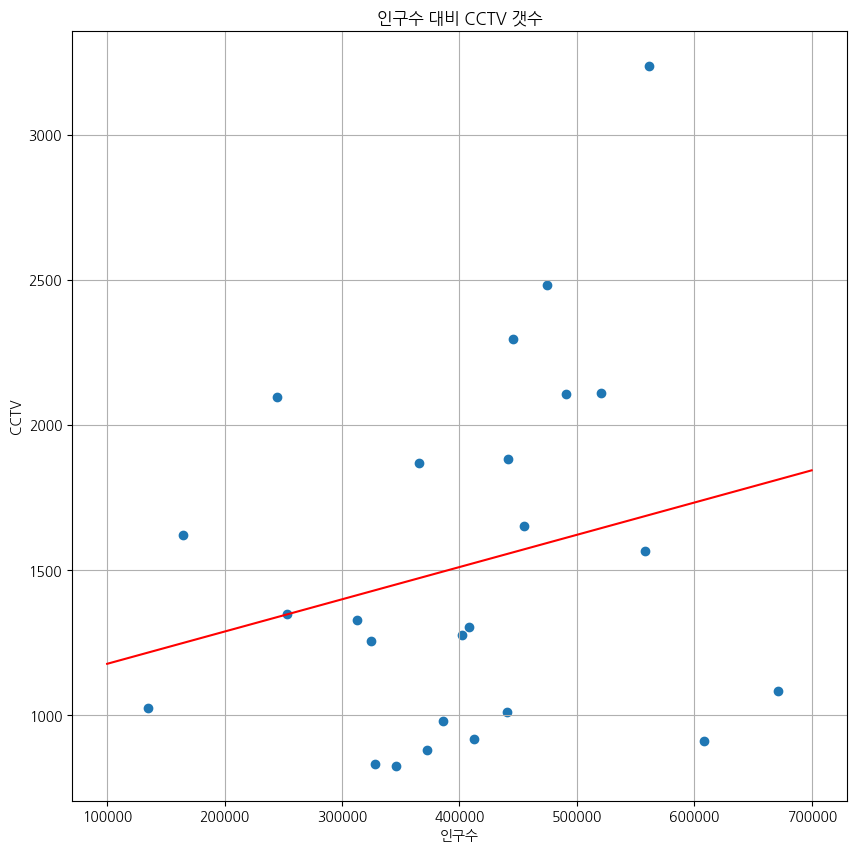

In [130]:
# scatter: 점그래프(숫자, 숫자)
# plot: 선그래프(숫자, 숫자)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data_result['인구수'], data_result['소계'])
ax.plot(model_df['인구수'], model_df['예측 CCTV 수'], color='red')

plt.title('인구수 대비 CCTV 갯수')
plt.xlabel('인구수')
plt.ylabel('CCTV')
ax.grid()

plt.show()

## 9. 강조하고 싶은 데이터 시각화

In [131]:
# 필요한 재료가 2가지
# 첫 번째: 실제값(실제 설치된 CCTV 갯수)
# 두 번째: 예측값(모델이 예측한 CCTV 갯수)
# 오차 = 실제값 - 예측값

In [136]:
# 첫 번째
data_result['소계']

구별
강남구     3238
강동구     1010
강북구      831
강서구      911
관악구     2109
광진구      878
구로구     1884
금천구     1348
노원구     1566
도봉구      825
동대문구    1870
동작구     1302
마포구      980
서대문구    1254
서초구     2297
성동구     1327
성북구     1651
송파구     1081
양천구     2482
영등포구    1277
용산구     2096
은평구     2108
종로구     1619
중구      1023
중랑구      916
Name: 소계, dtype: int64

In [138]:
# 두 번째
model.predict(x)

array([1688.79967399, 1554.64232206, 1429.7509233 , 1741.26857843,
       1644.20060502, 1478.98852665, 1555.97619248, 1346.92757439,
       1685.4905638 , 1450.01686118, 1472.00015722, 1519.22139312,
       1493.97789547, 1426.44514778, 1560.24680093, 1412.7540795 ,
       1571.3690571 , 1811.20562755, 1593.1678344 , 1512.03072001,
       1336.871303  , 1611.1573001 , 1247.73874702, 1214.76547029,
       1523.98664519])

In [139]:
# 실제값 - 예측값
data_result['소계'] - model.predict(x)

구별
강남구     1549.200326
강동구     -544.642322
강북구     -598.750923
강서구     -830.268578
관악구      464.799395
광진구     -600.988527
구로구      328.023808
금천구        1.072426
노원구     -119.490564
도봉구     -625.016861
동대문구     397.999843
동작구     -217.221393
마포구     -513.977895
서대문구    -172.445148
서초구      736.753199
성동구      -85.754080
성북구       79.630943
송파구     -730.205628
양천구      888.832166
영등포구    -235.030720
용산구      759.128697
은평구      496.842700
종로구      371.261253
중구      -191.765470
중랑구     -607.986645
Name: 소계, dtype: float64

In [140]:
# 오차 컬럼을 데이터프레임에 추가
data_result['오차'] = data_result['소계'] - model.predict(x)

In [141]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [143]:
df_sort_f = data_result.sort_values(by='오차', ascending=False) # 내림차순

In [144]:
df_sort_t = data_result.sort_values(by='오차') # 오름차순

In [145]:
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [146]:
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [160]:
data_result['인구수'][0], data_result['소계'][0], data_result.index[0]

(561052, 3238, '강남구')

In [171]:
from matplotlib.colors import ListedColormap

color_step = ['#e61912', '#d9d31e', '#1ed921', '#1ec6d9', '#1e34d9', '#ba1ed9']

my_cmap = ListedColormap(color_step)

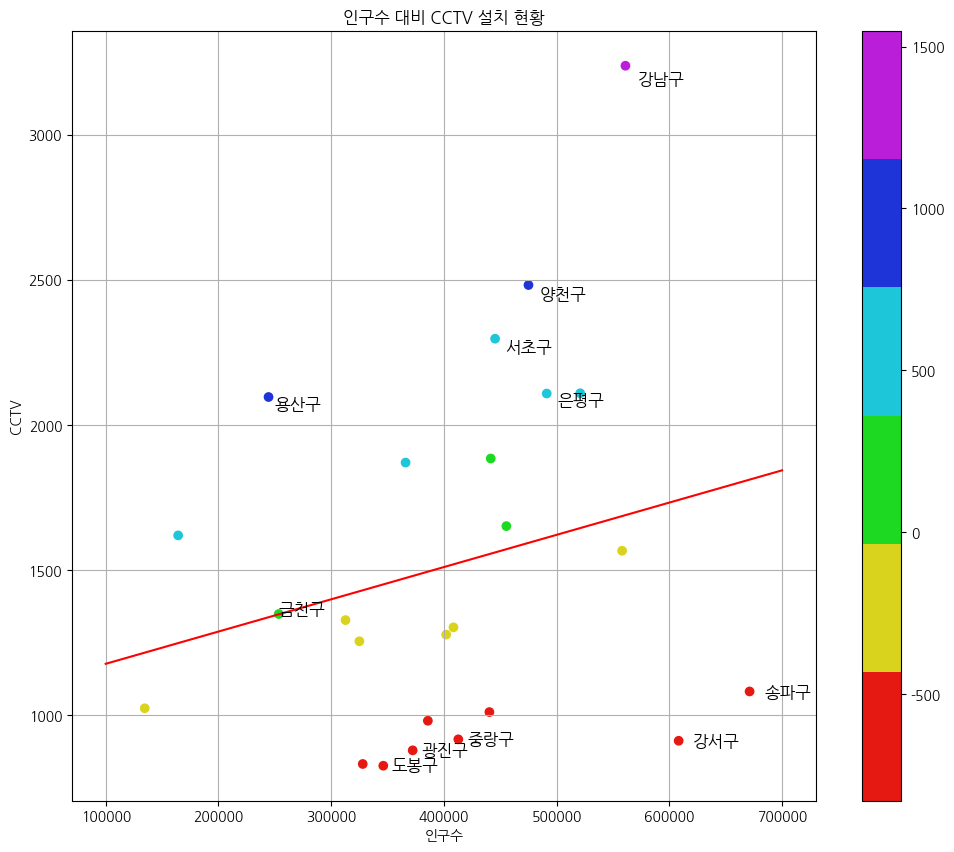

In [174]:
fig, ax = plt.subplots(figsize=(12, 10))
result = ax.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], cmap=my_cmap)
ax.plot(model_df['인구수'], model_df['예측 CCTV 수'], color='red')

# plt.text() 함수는 그래프상에 텍스트를 추가하는 데 사용
# 첫 번째 매개변수는 텍스트를 표시할 x 좌표
# 두 번째 매개변수는 텍스트를 표시할 y 좌표
# 세 번째 매개변수는 그래프상에 표시할 텍스트 내용

# 적절한 CCTV가 설치된 곳
plt.text(df_sort_f['인구수'][10], df_sort_f['소계'][10], df_sort_f.index[10], fontsize=12)

# CCTV가 많은 곳 상위 5개 이름을 그래프에 표현
for i in range(5):
  plt.text(df_sort_f['인구수'][i] * 1.02, df_sort_f['소계'][i] * 0.98, df_sort_f.index[i], fontsize=12)

# CCTV가 적은 곳 하위 5개 이름을 그래프로 표현
for i in range(5):
  plt.text(df_sort_t['인구수'][i] * 1.02, df_sort_t['소계'][i] * 0.98, df_sort_t.index[i], fontsize=12)

ax.set(xlabel='인구수', ylabel='CCTV', title='인구수 대비 CCTV 설치 현황')

plt.colorbar(result)
plt.grid()
plt.show()